In [15]:
PATH_ = "../../../../Dropbox (Brain Modulation Lab)/Shared Lab Folders/CRCNS/MOVEMENT DATA/ECoG_STN/XGB_Out/"
subjects = ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']

In [39]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [36]:
res_files = os.listdir(PATH_)

In [11]:
res = np.load(os.path.join(PATH_, res_files[0]), allow_pickle=True).tolist()

In [12]:
res.keys()

dict_keys(['y_pred_test', 'y_test', 'y_pred_train', 'y_train', 'score_tr', 'score_te', 'coord_patient'])

In [14]:
res["score_te"]["CON"].mean()

0.004036342321528768

In [37]:
res_ = []; # ECOG CON, ECOG IPS; STN CON, STN IPS
for loc in ["ECOG", "STN"]:
    for lat in ["CON", "IPS"]:
        patients_ = []
        for sub in subjects:
            files = [f for f in res_files if (sub in f) and (loc in f)]
            max_ = []
            for file in files:
                print(file)
                max_.append(np.max(np.load(os.path.join(PATH_, files[0]), 
                                           allow_pickle=True).tolist()["score_te"][lat]))
            patients_.append(np.max(max_))
        res_.append(patients_)  
            

000BestChpredictions_ECOG-ses-right.npy
001BestChpredictions_ECOG-ses-right.npy
001BestChpredictions_ECOG-ses-left.npy
004BestChpredictions_ECOG-ses-right.npy
004BestChpredictions_ECOG-ses-left.npy
005BestChpredictions_ECOG-ses-right.npy
005BestChpredictions_ECOG-ses-left.npy
006BestChpredictions_ECOG-ses-left.npy
006BestChpredictions_ECOG-ses-right.npy
007BestChpredictions_ECOG-ses-left.npy
008BestChpredictions_ECOG-ses-left.npy
009BestChpredictions_ECOG-ses-left.npy
010BestChpredictions_ECOG-ses-left.npy
010BestChpredictions_ECOG-ses-right.npy
013BestChpredictions_ECOG-ses-left.npy
014BestChpredictions_ECOG-ses-right.npy
000BestChpredictions_ECOG-ses-right.npy
001BestChpredictions_ECOG-ses-right.npy
001BestChpredictions_ECOG-ses-left.npy
004BestChpredictions_ECOG-ses-right.npy
004BestChpredictions_ECOG-ses-left.npy
005BestChpredictions_ECOG-ses-right.npy
005BestChpredictions_ECOG-ses-left.npy
006BestChpredictions_ECOG-ses-left.npy
006BestChpredictions_ECOG-ses-right.npy
007BestChpred

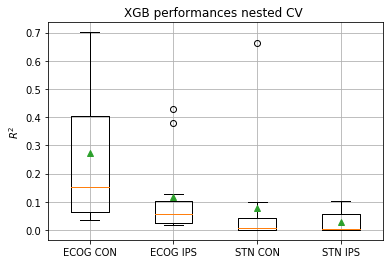

In [46]:
plt.boxplot(res_, showmeans=True)
plt.xticks([1,2, 3,4], ['ECOG CON', 'ECOG IPS', 'STN CON', 'STN IPS'])
plt.ylabel(r'$R^2$')
plt.title('XGB performances nested CV ')
plt.grid(True)
plt.show()